In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

### READING CSV

In [4]:
df=pd.read_csv("./dataset/survey_results_public.csv")
df1=pd.read_csv("./dataset/survey_results_public_2020.csv")
print(len(df.index))
print(len(df1.index))

88883
64461


In [5]:
df=df[["Country","EdLevel","YearsCodePro","Employment","ConvertedComp","UndergradMajor"]]
df=df.rename({"ConvertedComp":"Salary"},axis=1)
df.head()


,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
0,United Kingdom,Primary/elementary school,NaN,"Not employed, and not looking for work",NaN,NaN
1,Bosnia and Herzegovina,"Secondary school (e.g. American high school, G...",NaN,"Not employed, but looking for work",NaN,NaN
2,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,Employed full-time,8820.0,Web development or web design
3,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Less than 1 year,Employed full-time,61000.0,"Computer science, computer engineering, or sof..."
4,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)",9,Employed full-time,NaN,"Computer science, computer engineering, or sof..."


In [6]:
df1=df1[["Country","EdLevel","YearsCodePro","Employment","ConvertedComp","UndergradMajor"]]
df1=df1.rename({"ConvertedComp":"Salary"},axis=1)
df1.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN,"Computer science, computer engineering, or sof..."
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN,"Computer science, computer engineering, or sof..."
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN,"Computer science, computer engineering, or sof..."
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN,"Computer science, computer engineering, or sof..."


In [7]:
# Removing NULL salary
df=df[df["Salary"].notnull()]
df1=df1[df1["Salary"].notnull()]

print(df.shape[0])
print(df1.shape[0])

55823
34756


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         34756 non-null  object 
 1   EdLevel         34188 non-null  object 
 2   YearsCodePro    34621 non-null  object 
 3   Employment      34717 non-null  object 
 4   Salary          34756 non-null  float64
 5   UndergradMajor  32228 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.9+ MB


In [9]:
# Drop NAN rows
df=df.dropna()
df1=df1.dropna()
print(df.shape[0])
print(df1.shape[0])

50264
31559


In [10]:
df.isnull().sum()

Country           0
EdLevel           0
YearsCodePro      0
Employment        0
Salary            0
UndergradMajor    0
dtype: int64

### MERGING 2 DF

In [11]:
df=pd.concat([df,df1])

In [12]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
2,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,Employed full-time,8820.0,Web development or web design
3,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Less than 1 year,Employed full-time,61000.0,"Computer science, computer engineering, or sof..."
5,Canada,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3,Employed full-time,366420.0,Mathematics or statistics
8,New Zealand,Some college/university study without earning ...,4,Employed full-time,95179.0,"Computer science, computer engineering, or sof..."
12,United States,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",8,Employed full-time,90000.0,"Computer science, computer engineering, or sof..."


In [13]:
df.shape[0]

81823

In [14]:
def save():
    df.to_csv(r'dataset\final_dataset.csv',index=False)
def save_encoded():
    df.to_csv(r'dataset\final_dataset_encoded.csv',index=False)

In [15]:
def read(df):
    df=pd.read_csv("./dataset/final_dataset.csv")
def read_encoded(df):
    df=pd.read_csv("./dataset/final_dataset_encoded.csv")

In [16]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
2,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,Employed full-time,8820.0,Web development or web design
3,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Less than 1 year,Employed full-time,61000.0,"Computer science, computer engineering, or sof..."
5,Canada,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3,Employed full-time,366420.0,Mathematics or statistics
8,New Zealand,Some college/university study without earning ...,4,Employed full-time,95179.0,"Computer science, computer engineering, or sof..."
12,United States,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",8,Employed full-time,90000.0,"Computer science, computer engineering, or sof..."


### Cleaning UG major column

In [21]:
df["UndergradMajor"].value_counts()

Computer science, computer engineering, or software engineering                   51492
Another engineering discipline                                                     7033
Information systems, information technology, or system administration              5850
A natural science                                                                  3737
Web development or web design                                                      2797
A humanities discipline                                                            1833
A social science                                                                   1564
A business discipline (ex. accounting, finance, marketing)                         1137
I never declared a major                                                            728
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      502
A health science                                                                    271
Name: UndergradMajor, dtype: int

In [18]:
df=df[df["UndergradMajor"]!="Mathematics or statistics"]
df=df[df["UndergradMajor"]!="Fine arts or performing arts (ex. graphic design, music, studio art)" ]
df=df[df["UndergradMajor"]!="A humanities discipline (such as literature, history, philosophy, etc.) " ]
df=df[df["UndergradMajor"]!="A business discipline (such as accounting, finance, marketing, etc.)" ]

In [20]:
def ug(x):
     if "A natural science" in x:
          return "A natural science"
     if "A humanities discipline" in x:
          return "A humanities discipline"
     if "A health science" in x:
          return "A health science"
     if "Another engineering discipline" in x:
          return "Another engineering discipline" 
     if "A social science" in x:
          return "A social science"

     return x
df['UndergradMajor']=df['UndergradMajor'].apply(ug)

### Cleaning Country column

In [22]:
df["Country"].value_counts()

United States                       19891
India                                6185
United Kingdom                       5437
Germany                              4679
Canada                               3098
                                    ...  
Belize                                  1
Saint Vincent and the Grenadines        1
Seychelles                              1
Angola                                  1
Andorra                                 1
Name: Country, Length: 169, dtype: int64

In [23]:
def shorten(cat,cutoff):
    mp={}
    for i in range(len(cat)):
        if(cat.values[i]>=cutoff):
            mp[cat.index[i]]=cat.index[i]
        else:
            mp[cat.index[i]]='Other'
    return mp


In [24]:
cnt_mp=shorten(df.Country.value_counts(),400)
df["Country"]=df["Country"].map(cnt_mp)
df.Country.value_counts()

United States         19891
Other                  9034
India                  6185
United Kingdom         5437
Germany                4679
Canada                 3098
France                 2478
Brazil                 2251
Poland                 1798
Spain                  1751
Australia              1731
Netherlands            1645
Russian Federation     1367
Sweden                 1237
Italy                  1189
Switzerland             810
Turkey                  771
Mexico                  705
Pakistan                696
Ukraine                 689
Israel                  677
Romania                 657
Belgium                 641
Iran                    624
Austria                 624
Czech Republic          608
Norway                  607
Denmark                 561
South Africa            560
Ireland                 553
Portugal                526
Argentina               521
Finland                 506
New Zealand             489
Greece                  458
Bulgaria            

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76944 entries, 2 to 64154
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         76944 non-null  object 
 1   EdLevel         76944 non-null  object 
 2   YearsCodePro    76944 non-null  object 
 3   Employment      76944 non-null  object 
 4   Salary          76944 non-null  float64
 5   UndergradMajor  76944 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.1+ MB


In [39]:
print(df.shape[0])

76944


### Removing salary outliers

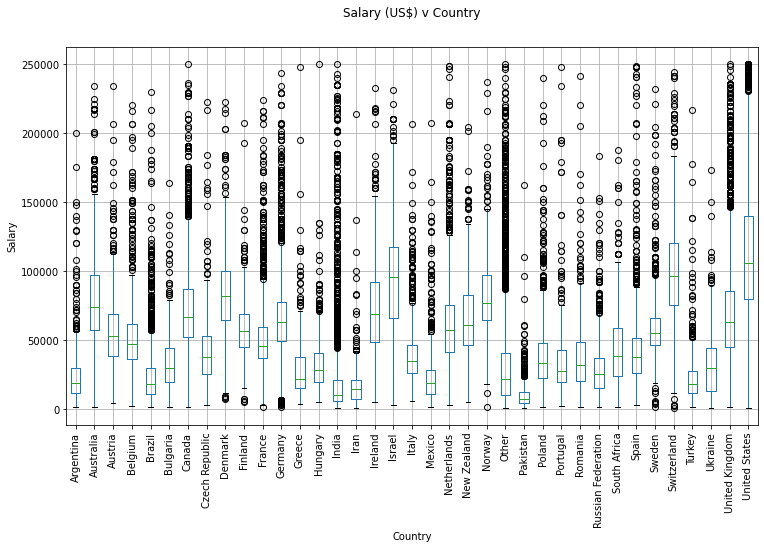

In [28]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [43]:
df.describe()

,Salary
count,71276.000000
mean,62917.877448
std,48723.085294
min,1000.000000
25%,24504.000000
50%,52942.000000
75%,88181.500000
max,250000.000000


In [16]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
0,Other,Bachelor’s degree,1.0,Employed full-time,8820.0,Web development or web design
1,United States,Bachelor’s degree,0.5,Employed full-time,61000.0,"Computer science, computer engineering, or sof..."
2,New Zealand,Less than a Bachelors,4.0,Employed full-time,95179.0,"Computer science, computer engineering, or sof..."
3,United States,Master’s degree,8.0,Employed full-time,90000.0,"Computer science, computer engineering, or sof..."
4,Germany,Post grad,2.0,Employed full-time,57060.0,"Computer science, computer engineering, or sof..."


In [27]:
df=df[df["Salary"]<=250000]
df=df[df["Salary"]>=1000]

In [11]:
df.shape[0]

88883

In [48]:
save_encoded()

### Cleaning YearsCodePro column

In [31]:
df["YearsCodePro"].value_counts()

3      7585
2      7372
5      6433
4      6176
6      4601
10     4267
1      3837
7      3731
8      3631
0.5    2934
12     2248
15     2140
9      2052
20     1885
11     1717
13     1434
14     1201
18      963
16      862
25      714
19      664
17      653
22      639
21      544
30      431
23      426
24      317
26      211
28      195
35      187
27      177
32      156
33      118
29      112
34      104
31      103
40       86
38       79
36       66
37       54
39       44
42       27
41       23
43       17
50       16
44       14
45       13
50        5
48        4
49        3
47        3
46        2
Name: YearsCodePro, dtype: int64

In [30]:
df["YearsCodePro"]=df["YearsCodePro"].apply(lambda x: 50 if x=='More than 50 years' else x)
df["YearsCodePro"]=df["YearsCodePro"].apply(lambda x: 0.5 if x=='Less than 1 year' else x)

### Cleaning Edlevel column

In [34]:
df["EdLevel"].value_counts()


Bachelor’s degree        37626
Master’s degree          18821
Less than a Bachelors    11626
Post grad                 3203
Name: EdLevel, dtype: int64

In [33]:
def ed(x):
    if 'Bachelor’s degree' in x:
        return "Bachelor’s degree"
    if 'Master’s degree' in x:
        return "Master’s degree"
    if 'Professional degree' in x or 'Other doctoral' in x:
        return "Post grad"
    return 'Less than a Bachelors'
df['EdLevel']=df['EdLevel'].apply(ed)

In [69]:
# save()
df=pd.read_csv("./dataset/final_dataset.csv")
print(df.shape[0])

71276


In [35]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
2,Other,Bachelor’s degree,1,Employed full-time,8820.0,Web development or web design
3,United States,Bachelor’s degree,0.5,Employed full-time,61000.0,"Computer science, computer engineering, or sof..."
8,New Zealand,Less than a Bachelors,4,Employed full-time,95179.0,"Computer science, computer engineering, or sof..."
12,United States,Master’s degree,8,Employed full-time,90000.0,"Computer science, computer engineering, or sof..."
13,Germany,Post grad,2,Employed full-time,57060.0,"Computer science, computer engineering, or sof..."


## Label Encoding columns

In [36]:
from sklearn.preprocessing import LabelEncoder
le_edu=LabelEncoder()
df['EdLevel']=le_edu.fit_transform(df['EdLevel'])
df['EdLevel'].value_counts()
print(le_edu.classes_)
print(le_edu.transform(list(le_edu.classes_)))

['Bachelor’s degree' 'Less than a Bachelors' 'Master’s degree' 'Post grad']
[0 1 2 3]


In [38]:
le_country=LabelEncoder()
df['Country']=le_country.fit_transform(df['Country'])
df["Country"].value_counts()
print(le_country.classes_)
print(le_country.transform(list(le_country.classes_)))

['Argentina' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'India' 'Iran' 'Ireland' 'Israel' 'Italy' 'Mexico'
 'Netherlands' 'New Zealand' 'Norway' 'Other' 'Pakistan' 'Poland'
 'Portugal' 'Romania' 'Russian Federation' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Turkey' 'Ukraine' 'United Kingdom' 'United States']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


In [39]:
from sklearn.preprocessing import LabelEncoder
le_ug=LabelEncoder()
df['UndergradMajor']=le_ug.fit_transform(df['UndergradMajor'])
df['UndergradMajor'].value_counts()
print(le_ug.classes_)
print(le_ug.transform(list(le_ug.classes_)))

['A business discipline (ex. accounting, finance, marketing)'
 'A health science' 'A humanities discipline' 'A natural science'
 'A social science' 'Another engineering discipline'
 'Computer science, computer engineering, or software engineering'
 'Fine arts or performing arts (such as graphic design, music, studio art, etc.)'
 'I never declared a major'
 'Information systems, information technology, or system administration'
 'Web development or web design']
[ 0  1  2  3  4  5  6  7  8  9 10]


In [40]:
from sklearn.preprocessing import LabelEncoder
le_emp=LabelEncoder()
df['Employment']=le_emp.fit_transform(df['Employment'])
df['Employment'].value_counts()
print(le_emp.classes_)
print(le_emp.transform(list(le_emp.classes_)))

['Employed full-time' 'Employed part-time'
 'Independent contractor, freelancer, or self-employed']
[0 1 2]


In [37]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
2,Other,0,1,Employed full-time,8820.0,Web development or web design
3,United States,0,0.5,Employed full-time,61000.0,"Computer science, computer engineering, or sof..."
8,New Zealand,1,4,Employed full-time,95179.0,"Computer science, computer engineering, or sof..."
12,United States,2,8,Employed full-time,90000.0,"Computer science, computer engineering, or sof..."
13,Germany,3,2,Employed full-time,57060.0,"Computer science, computer engineering, or sof..."


In [76]:
df.shape[0]

71276

## TEST TRAIN SPLIT

In [41]:
from sklearn.model_selection import train_test_split
df=pd.read_csv('./dataset/final_dataset_encoded.csv')
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
train.to_csv(r'./dataset/train.csv')
test.to_csv(r'./dataset/test.csv')


train=pd.read_csv("./dataset/train.csv")
test=pd.read_csv("./dataset/test.csv")
print(train.shape[0])
print(test.shape[0])

57020
14256


In [42]:
train=train.drop("Unnamed: 0",axis=1)
test=test.drop("Unnamed: 0",axis=1)

x_train=train.drop("Salary",axis=1)
y_train=train['Salary']


x_test=test.drop("Salary",axis=1)
y_test=test['Salary']

print(x_train.head())
print(x_test.head())

   Country  EdLevel  YearsCodePro  Employment  UndergradMajor
0       36        0           4.0           0               9
1       23        0          11.0           0               5
2       11        2           1.0           0               6
3        8        1           5.0           0               6
4       11        2          13.0           0               6
   Country  EdLevel  YearsCodePro  Employment  UndergradMajor
0       14        0           1.0           0              10
1       16        3           5.0           0               4
2       36        0          30.0           2               6
3       11        0           2.0           1               6
4       36        0          33.0           2               0


## Linear Regressor

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def test_MSE(model,x_test,y_test):
    y_pred=model.predict(x_test)
    err=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    print('R2 : ',r2)
    print('RMSE : ',err)

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train.values)

LinearRegression()

In [45]:
test_MSE(lin_reg,x_test,y_test)

R2 :  0.3007034885632184
RMSE :  41037.12160096804


## Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x_train,y_train.values)

DecisionTreeRegressor()

In [47]:
test_MSE(dt_reg,x_test,y_test)

R2 :  0.5359768223059351
RMSE :  33428.43517737111


## RANDOM FOREST

In [48]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train.values)

RandomForestRegressor()

In [49]:
test_MSE(rf_reg,x_test,y_test)

R2 :  0.5866112122247417
RMSE :  31551.902914095197


In [50]:
ab_reg=AdaBoostRegressor()
ab_reg.fit(x_train,y_train.values)
test_MSE(ab_reg,x_test,y_test)

R2 :  0.38592870184071837
RMSE :  38455.2474023763


In [51]:
from sklearn.linear_model import LassoLarsCV
lasso_reg=LassoLarsCV(cv=5,verbose=1)
lasso_reg.fit(x_train,y_train.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


LassoLarsCV(cv=5, verbose=1)

In [52]:
test_MSE(lasso_reg,x_test,y_test)

R2 :  0.3007034885632184
RMSE :  41037.12160096804


## GRID_SEARCH CV

### GRID SEARCH DECISION TREE

In [53]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':[12,13,15,17,20],"criterion":["mse"],"min_samples_split":[25,50,75,100],"min_samples_leaf":[15,40,75,100]}
dt_GS=DecisionTreeRegressor(random_state=0)
gs_dt=GridSearchCV(dt_GS,params,cv=10,n_jobs = -1,verbose=1)
gs_dt.fit(x_train,y_train.values)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['mse'],
                         'max_depth': [12, 13, 15, 17, 20],
                         'min_samples_leaf': [15, 40, 75, 100],
                         'min_samples_split': [25, 50, 75, 100]},
             verbose=1)

In [54]:
print(gs_dt.best_params_)
print(gs_dt.best_score_)
test_MSE(gs_dt,x_test,y_test)

{'criterion': 'mse', 'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 75}
0.6119412882639763
R2 :  0.6175541068426118
RMSE :  30348.079366387992


### GRID SEARCH RANDOM FOREST

In [55]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':[5,10,15],'n_estimators':[125,150,175,200],'max_features' : ['auto']}
# , 'min_samples_leaf':[14,16,22,28,32],'min_samples_split': [8, 10, 12]}
rf_GS=RandomForestRegressor(random_state=0)
gs_rf=GridSearchCV(rf_GS,params,cv=4,n_jobs=-1,verbose=1)
gs_rf.fit(x_train,y_train.values)
print(gs_rf.best_params_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 150}


In [56]:
test_MSE(gs_rf,x_test,y_test)

R2 :  0.613893472487326
RMSE :  30492.9739155699


### GRID SEARCH ADA BOOST FOREST

In [57]:
from sklearn.model_selection import GridSearchCV
params={'learning_rate':[2,3,4,5,7],'n_estimators':[5,10,25,60,100]}
# , 'min_samples_leaf':[14,16,22,28,32],'min_samples_split': [8, 10, 12]}
ad_GS=AdaBoostRegressor(random_state=0)
gs_ad=GridSearchCV(ad_GS,params,verbose=1,n_jobs=-1)
gs_ad.fit(x_train,y_train.values)
print(gs_ad.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'learning_rate': 7, 'n_estimators': 5}


In [58]:
test_MSE(gs_ad,x_test,y_test)

R2 :  0.47864217682280297
RMSE :  35433.5085742679


In [59]:
x_train.head()

,Country,EdLevel,YearsCodePro,Employment,UndergradMajor
0,36,0,4.0,0,9
1,23,0,11.0,0,5
2,11,2,1.0,0,6
3,8,1,5.0,0,6
4,11,2,13.0,0,6


## RANDOM SEARCH CV

### RS RANDOM FOREST

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
grid = {
    "n_estimators":np.arange(10,150,10),
    "max_depth":[None,3,5,10,15],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_features": [0.5,1,"sqrt","auto"],
    "max_samples":[10000,12000,15000,20000]
}
rs_rf = RandomizedSearchCV( RandomForestRegressor(random_state=0),param_distributions = grid,n_iter=5, cv=7, verbose=True,n_jobs=-1)
rs_rf.fit(x_train,y_train.values)

Fitting 7 folds for each of 5 candidates, totalling 35 fits


RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(random_state=0),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10, 15],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000, 12000, 15000,
                                                        20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140])},
                   verbose=True)

In [61]:
print(rs_rf.best_params_)
print(rs_rf.best_score_)
test_MSE(rs_rf,x_test,y_test)

{'n_estimators': 40, 'min_samples_split': 8, 'min_samples_leaf': 11, 'max_samples': 10000, 'max_features': 'auto', 'max_depth': None}
0.615144650370007
R2 :  0.6182709079696224
RMSE :  30319.626008195126


## SAVING MODEL AND ENCODERS

In [78]:
data={'le_country':le_country,'le_edu':le_edu,'le_emp':le_emp,'le_ug':le_ug}
with open('./models/encoders.pkl','wb') as file:
    pickle.dump(data,file)

In [62]:
# SAVE RS RANDOM FOREST MODEL
data={'model':rs_rf}
with open('./models/rs_rf_model.pkl','wb') as file:
    pickle.dump(data,file)

FileNotFoundError: [Errno 2] No such file or directory: './model/rs_rf_model.pkl'

In [132]:
# SAVE GS RANDOM FOREST TREE MODEL
data={'model':gs_rf}
with open('./models/gs_rf_model.pkl','wb') as file:
    pickle.dump(data,file)

## LOADING MODEL AND ENCODERS

In [133]:
with open('./models/encoders.pkl','rb') as file:
    data=pickle.load(file)

nle_country=data["le_country"]
nle_edu=data["le_edu"]
nle_emp=data["le_emp"]
nle_ug=data["le_ug"]
with open('./models/gs_rf_model.pkl','rb') as file:
    data=pickle.load(file)
model=data["model"]

## PREDICTING SALARY

In [139]:
def prepare(data):
    x=np.array([data])
    x[:,0]=nle_country.transform(x[:,0])
    x[:,1]=nle_edu.transform(x[:,1])
    x[:,3]=nle_emp.transform(x[:,3])
    x[:,4]=nle_ug.transform(x[:,4])
    x=x.astype(float)
    return x


# x=prepare(["India","Bachelor’s degree",2,"Employed full-time","Computer science, computer engineering, or software engineering"])
# x=prepare(["United States","Bachelor’s degree",20,"Independent contractor, freelancer, or self-employed","A business discipline (ex. accounting, finance, marketing)"])


x=prepare(["Canada","Bachelor’s degree",1,"Employed full-time","Web development or web design"])
# 52704.0
y_pred=model.predict(x);
y_pred

array([47960.02885709])